# Interest Rate Modelling
## Lecture 1 - Ornstein-Uhlenbeck Process

In [1]:
import numpy as np
from numpy.random import normal as N
import matplotlib.pyplot as plt

Ornstein-Uhlenbeck Process:

$$dx_t = \theta * (\mu - x_t)*dt + \sigma * dW_t$$

In Simulation:

$$ x_t = x_{t-1} + \theta * (\mu - x_{t-1})*dt + \sigma * \mathcal{N}(0,\sqrt{dt}) $$

In [2]:
def orn_uhl_process(dt=0.1, theta=1.2, mu=0.5, sigma=0.3, n=10_000):
    # initialize x(t) with all zeros
    x = np.zeros(n)

    for t in range(1, n):
        x[t] = x[t-1] + theta*(mu-x[t-1])*dt + sigma * N(0, np.sqrt(dt))

    return x


def plot_process(data, mu):
    plt.figure(figsize=(12, 4))
    plt.plot(data, lw=0.9)
    plt.axhline(mu, label="$mu$", ls="--", c="k", alpha=0.5)
    plt.xlabel("Time $t$")
    plt.ylabel("$x(t)$")
    plt.title("Ornstein-Uhlenbeck Process")
    plt.legend()

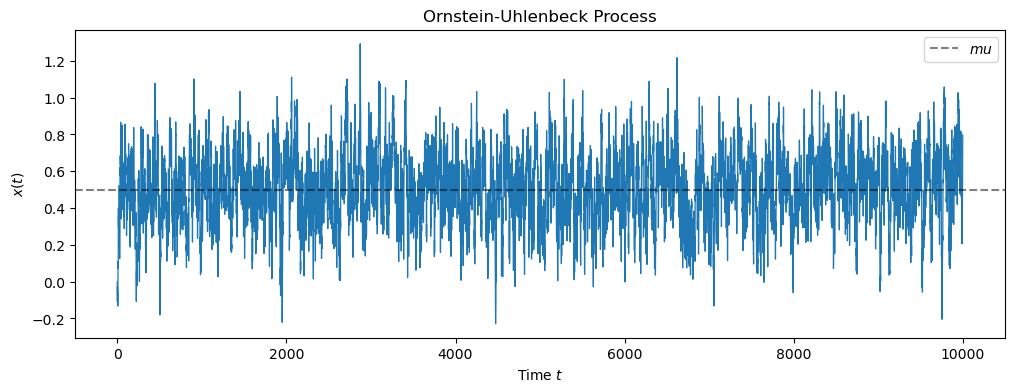

In [3]:
mu = 0.5
sigma = 0.3

np.random.seed(2020)
time_series = orn_uhl_process(mu=mu, sigma=sigma)
plot_process(time_series, mu)

## Lecture 2 - Vasicek Model

Vasicek Model:
$$ dr(t) = \kappa * (\theta- r(t))* dt + \sigma *dW(t)$$

In Simulation:
$$r(t) = r(t-1) + \kappa * (\theta- r(t-1))* dt + \sigma * \mathcal{N}(0, \sqrt{dt})$$

In [4]:
def vasicek_model(r0, kappa, theta, sigma, T=1.0, n=1000):
    # timestep 
    dt = T/float(n)
    # timeline
    t = np.linspace(0, T, n+1)
    # interest rates time series
    rates = [r0]
    # simulation
    for _ in range(n):
        dr = kappa * (theta - rates[-1])* dt  + sigma * N(0, np.sqrt(dt))
        rates.append(rates[-1] + dr)

    return t, rates


def plot_process(time, rates):
    plt.figure(figsize=(12, 4))
    plt.plot(time, rates, lw=2)
    plt.grid(alpha=.33)
    plt.xlabel("Time $t$")
    plt.ylabel("Interest Rate $r(t)$")
    plt.title("Vasicek Model")

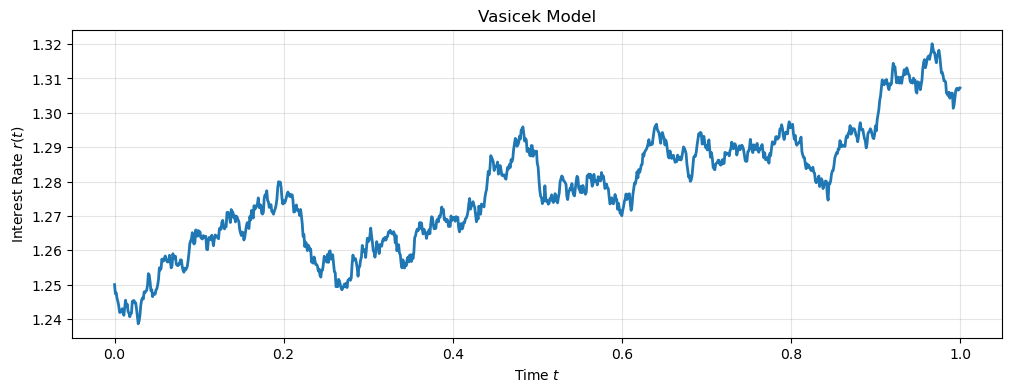

In [5]:
np.random.seed(2020)

time, rates = vasicek_model(r0=1.25, kappa=0.9, theta=1.4, sigma=0.05)
plot_process(time, rates)